In [1]:
#Setup
#pandas for data analysis
#numpy for array and matrices
#matplotlib for graph previews

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages
import warnings
warnings.filterwarnings('ignore')

#Load files
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the data
mouse_data = pd.read_csv(mouse_data)
clinical_data = pd.read_csv(clinical_data)

# Aggregate the data into a single dataset
full_clinical_data = pd.merge(clinical_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display data_table
full_clinical_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Group mean tumor vol by Drug and Timepoint 
mean_tumor_vol = full_clinical_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to a DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# re-index the column headings
mean_tumor_vol = mean_tumor_vol.reset_index()

# Preview
mean_tumor_vol.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = full_clinical_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to a DataFrame
tumor_vols_sem = pd.DataFrame(sem_tumor_vol)

# Preview DataFrame
sem_tumor_vol.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Re-Format the Data Frames
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_vol_pivot = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

sem_tumor_vol = sem_tumor_vol.reset_index()
sem_tumor_vol_pivot = sem_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview
mean_tumor_vol_pivot.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


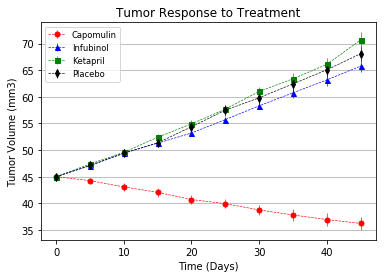

In [5]:
# Generate plot, xerr or yerr are used for error bars
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Capomulin"], yerr=sem_tumor_vol_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.65)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Infubinol"], yerr=sem_tumor_vol_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.65)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Ketapril"], yerr=sem_tumor_vol_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.65)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Placebo"], yerr=sem_tumor_vol_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.65)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("data/Fig1picture.png")

# Show the Figure
plt.show()

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = full_clinical_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_sites = pd.DataFrame(mean_met_sites)

# Preview DataFrame
mean_met_sites.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites = full_clinical_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_met_sites = pd.DataFrame(sem_met_sites)

# Preview DataFrame
sem_met_sites.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Re-Format Data Frames
mean_met_sites = mean_met_sites.reset_index()
mean_met_sites_pivot = mean_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

sem_met_sites = sem_met_sites.reset_index()
sem_met_sites_pivot = sem_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview 
mean_met_sites_pivot.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


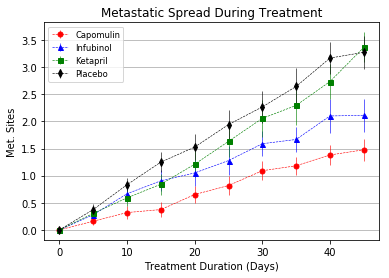

In [9]:
# Generate Plot
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Capomulin"], yerr=sem_met_sites_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.60)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Infubinol"], yerr=sem_met_sites_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.60)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Ketapril"], yerr=sem_met_sites_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.60)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Placebo"], yerr=sem_met_sites_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.60)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save
plt.savefig("data/Fig2picture.png")

# Show the Figure
plt.show(5)

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint
Count_Survival = full_clinical_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
Count_Survival = pd.DataFrame({"Mouse Count": Count_Survival})

# Preview DataFrame
Count_Survival.head(5).reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Re-Format Data Frames
Count_Survival = Count_Survival.reset_index()
survival_count_pivot = Count_Survival.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


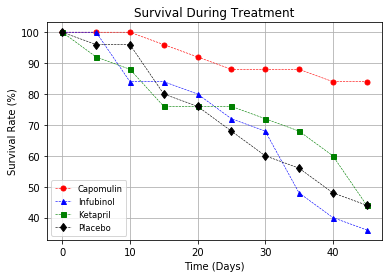

In [12]:
# Generate Plot, loc=best is for best legend location
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.60)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.60)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.60)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.60)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save Figure
plt.savefig("data/Fig3picture.png")

# Show Figure
plt.show()

In [13]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (mean_tumor_vol_pivot.iloc[-1] - mean_tumor_vol_pivot.iloc[0]) / mean_tumor_vol_pivot.iloc[0]
sem_tumor_pct_change =  100 * (sem_tumor_vol_pivot.iloc[-1] - sem_tumor_vol_pivot.iloc[0]) / sem_tumor_vol_pivot.iloc[0]

# Display the data
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

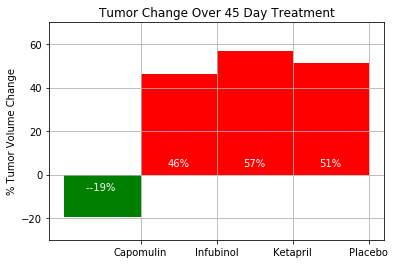

In [20]:
# Store into Tuple
pct_change = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_change))  
width = 1
Pass = ax.bar(ind[0], pct_change[0], width, color='green')
Fail = ax.bar(ind[1:], pct_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions and pass in Pass/Fail
autolabelPass(Pass)
autolabelFail(Fail)

# Save the Figure
fig.savefig("data/Fig4picture.png")

# Display the Figure
fig.show()

In [ ]:
#OBSERVATIONS
#1. Capomulin along with Ramicane are the only two drugs to lead to a decrease in tumor volume after 45 days of treatment all others increased it
#2. Capomulin survival rate was amongst the highest after 45 days of drug treatment
#3. Placebo did not fare well in most tests and was similar in many ways to Ketapril when comparing the spread of tumor to metastatic sites